<a href="https://colab.research.google.com/github/Pkodeboy/64061_AML/blob/main/Assignment2/Assignment_2_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment - 2 Deep Convolutional Neural Network**

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import TensorFlow and its submodules
from tensorflow import keras
from keras import layers
from keras.utils import image_dataset_from_directory
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint



In [ ]:
from google.colab import files
files.upload()
# The 'files.upload()' function allows users to upload files interactively in a Google Colab environment.



Saving kaggle.json to kaggle (3).json


{'kaggle (3).json': b'{"username":"kodeboyinap","key":"050b3c81f755af591810500a8787dcaf"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
#Downloading the data set from the kaggle cometition environment
!kaggle competitions  download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#Unzipping the file
!unzip -qq dogs-vs-cats.zip


replace sampleSubmission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
#Unzipping the file
!unzip -qq train.zip

replace train/cat.0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
# Import necessary libraries
import os
import shutil
import pathlib

# Define the original directory containing the training data
original_dir = pathlib.Path("train")

# Define the new base directory where you want to create subsets of the data
new_base_dir = pathlib.Path("cats_vs_dogs_small")

# Function to create a subset of data
def make_subset(subset_name, start_index, end_index):
    # Loop through categories ("cat" and "dog")
    for category in ("cat", "dog"):
        # Create a directory for the current category within the subset
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)

        # Generate a list of filenames for the current category and index range
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]

        # Copy the selected files from the original directory to the subset directory
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname, dst=dir / fname)

# Create subsets of the data using the make_subset function
make_subset("train", start_index=0, end_index=500)         # Create a training subset
make_subset("validation", start_index=1000, end_index=1250)  # Create a validation subset
make_subset("test", start_index=1500, end_index=1750)       # Create a test subset


In [ ]:
# Create a training dataset from the "train" directory
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",  # Directory containing the training data
    image_size=(180, 180),    # Resize images to 180x180 pixels
    batch_size=32             # Batch size for training dataset
)

# Create a validation dataset from the "validation" directory
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",  # Directory containing the validation data
    image_size=(180, 180),        # Resize images to 180x180 pixels
    batch_size=32                 # Batch size for validation dataset
)

# Create a test dataset from the "test" directory
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",  # Directory containing the test data
    image_size=(180, 180),   # Resize images to 180x180 pixels
    batch_size=32            # Batch size for test dataset
)



Found 1000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [ ]:
# Iterate through the training dataset to extract batches of data and labels
for data_batch, labels_batch in train_dataset:
    # Print the shape of the data batch
    print("data batch shape:", data_batch.shape)

    # Print the shape of the labels batch
    print("labels batch shape:", labels_batch.shape)
    break


data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)


model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_26 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 89, 89, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 43, 43, 64)        0         
 ng2D)                                                     

In [ ]:
# Compiling the Model
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
# Saving the results of the model
callbacks = [
keras.callbacks.ModelCheckpoint(
    filepath="convnet_from_scratch.tf",
    save_best_only=True,
    monitor="val_loss",
    save_format="tf")
]

In [ ]:
# Fitting/Running the Model
Model_1 = model.fit(
          train_dataset,
          epochs= 30,
          validation_data= validation_dataset,
          callbacks = callbacks)

Epoch 1/30
32/32 [==============================] - 4s 59ms/step - loss: 0.6969 - accuracy: 0.5000 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 2/30
32/32 [==============================] - 2s 54ms/step - loss: 0.6924 - accuracy: 0.5270 - val_loss: 0.6856 - val_accuracy: 0.6060
Epoch 3/30
32/32 [==============================] - 2s 52ms/step - loss: 0.6764 - accuracy: 0.5840 - val_loss: 0.6722 - val_accuracy: 0.6460
Epoch 4/30
32/32 [==============================] - 2s 68ms/step - loss: 0.6392 - accuracy: 0.6420 - val_loss: 0.6682 - val_accuracy: 0.5660
Epoch 5/30
32/32 [==============================] - 1s 22ms/step - loss: 0.6513 - accuracy: 0.5920 - val_loss: 0.6893 - val_accuracy: 0.5440
Epoch 6/30
32/32 [==============================] - 2s 55ms/step - loss: 0.6353 - accuracy: 0.6490 - val_loss: 0.6527 - val_accuracy: 0.6140
Epoch 7/30
32/32 [==============================] - 2s 53ms/step - loss: 0.5779 - accuracy: 0.7180 - val_loss: 0.5998 - val_accuracy: 0.6920
Epoch 8/30
32

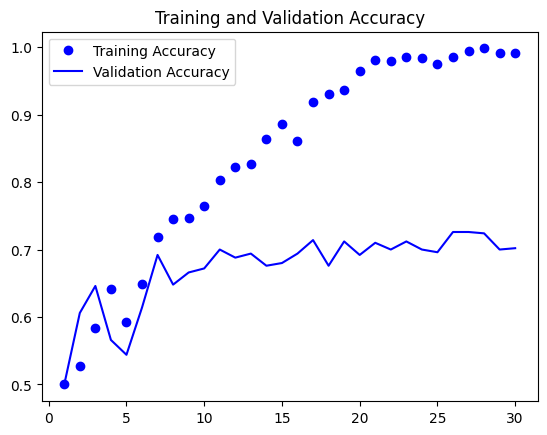

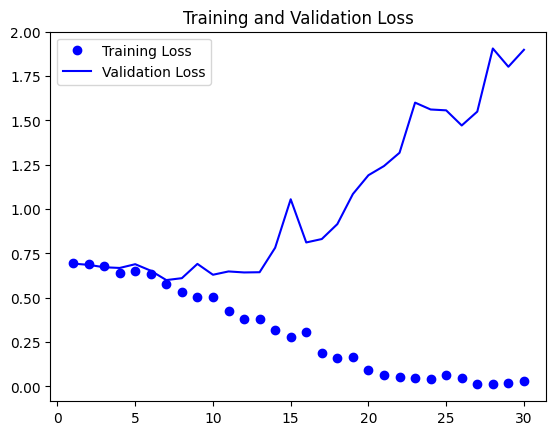

In [ ]:
accuracy = Model_1.history["accuracy"]
val_accuracy = Model_1.history["val_accuracy"]

loss = Model_1.history["loss"]
val_loss = Model_1.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training Accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.tf")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'Loss: {test_loss:.3f}')
print(f"Test accuracy: {test_acc:.3f}")


16/16 [==============================] - 0s 9ms/step - loss: 0.6260 - accuracy: 0.6440
Loss: 0.626
Test accuracy: 0.644


In [ ]:
# To deprecate warnings that are making the output look clumsy

import logging
logging.getLogger('tensorflow').disabled = True

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2)
    ]
)

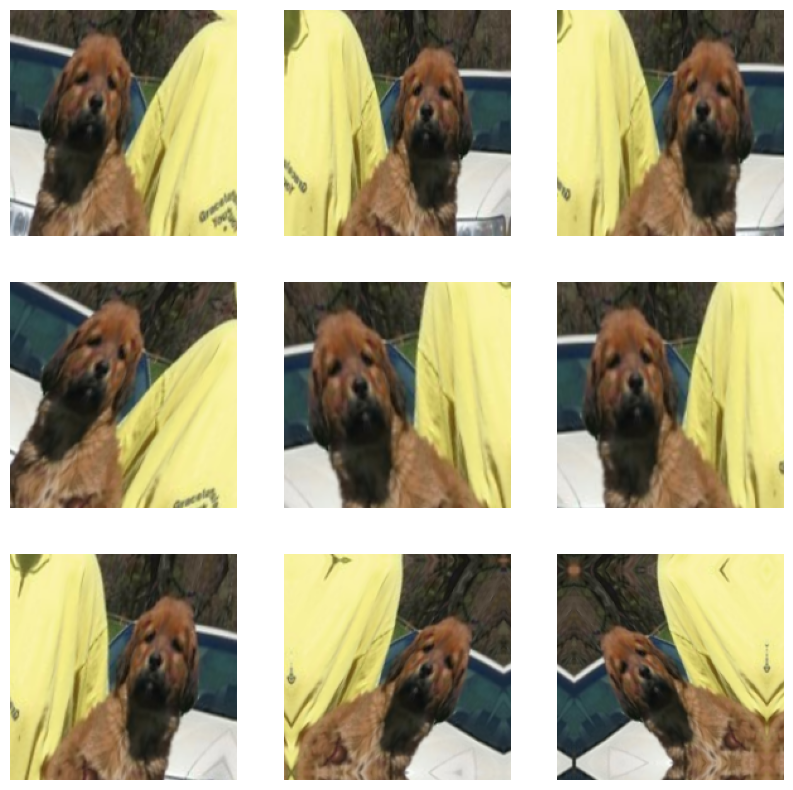

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
   for i in range(9):
      augmented_images = data_augmentation(images)
      ax = plt.subplot(3, 3, i + 1)
      plt.imshow(augmented_images[0].numpy().astype("uint8"))
      plt.axis("off")

**Model - 2 MaxPooling Operation with Increase in filters from 32 to 256 in 5 Input Layers with the data being used from the Augmented Images and a droput rate of 0.5**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
# Compiling the model
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])


# Saving the results of the model
callbacks = [
keras.callbacks.ModelCheckpoint(
    filepath="convnet_from_scratch.tf",
    save_best_only=True,
    monitor="val_loss",
    save_format="tf")
]



Model_2 = model.fit(
          train_dataset,
          epochs= 30,
          validation_data= validation_dataset,
          callbacks= callbacks)

Epoch 1/30
32/32 [==============================] - 5s 97ms/step - loss: 0.6973 - accuracy: 0.4950 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 2/30
32/32 [==============================] - 3s 78ms/step - loss: 0.6925 - accuracy: 0.5440 - val_loss: 0.6916 - val_accuracy: 0.5200
Epoch 3/30
32/32 [==============================] - 1s 24ms/step - loss: 0.6912 - accuracy: 0.5570 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 4/30
32/32 [==============================] - 1s 24ms/step - loss: 0.6854 - accuracy: 0.5680 - val_loss: 0.7518 - val_accuracy: 0.5360
Epoch 5/30
32/32 [==============================] - 2s 78ms/step - loss: 0.6793 - accuracy: 0.6150 - val_loss: 0.6715 - val_accuracy: 0.5900
Epoch 6/30
32/32 [==============================] - 2s 76ms/step - loss: 0.6602 - accuracy: 0.5740 - val_loss: 0.6491 - val_accuracy: 0.6140
Epoch 7/30
32/32 [==============================] - 2s 77ms/step - loss: 0.6536 - accuracy: 0.6450 - val_loss: 0.6318 - val_accuracy: 0.6560
Epoch 8/30
32

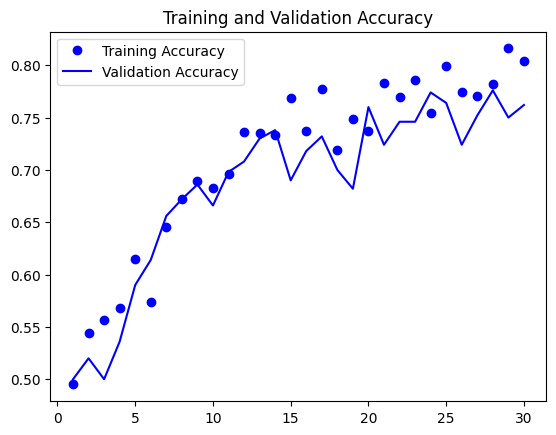

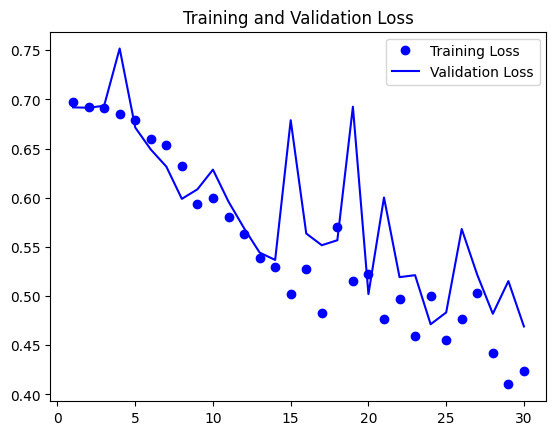

In [ ]:
accuracy = Model_2.history["accuracy"]
val_accuracy = Model_2.history["val_accuracy"]

loss = Model_2.history["loss"]
val_loss = Model_2.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training Accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.tf")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'Loss: {test_loss:.3f}')
print(f"Test accuracy: {test_acc:.3f}")

16/16 [==============================] - 0s 10ms/step - loss: 0.5517 - accuracy: 0.7480
Loss: 0.552
Test accuracy: 0.748


**Model - 3 MaxPooling Operation with Increase in filters from 32 to 512 in 6 Input Layers with the use of Augmented Images and Dropout rate of 0.5**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential_3 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_8 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_41 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 89, 89, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_42 (Conv2D)          (None, 87, 87, 64)        18496     
                                                           

In [ ]:
# Compiling the Model
model.compile(loss= "binary_crossentropy",
              optimizer= "adam",
              metrics= ["accuracy"])


# Saving the results of the model
callbacks = [
keras.callbacks.ModelCheckpoint(
    filepath="convnet_from_scratch.tf",
    save_best_only=True,
    monitor="val_loss",
    save_format="tf")
]


# Model Fit
Model_3 = model.fit(
          train_dataset,
          epochs= 30,
          validation_data= validation_dataset,
          callbacks= callbacks)


Epoch 1/30
32/32 [==============================] - 7s 122ms/step - loss: 0.6966 - accuracy: 0.4890 - val_loss: 0.6915 - val_accuracy: 0.5060
Epoch 2/30
32/32 [==============================] - 1s 25ms/step - loss: 0.6935 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/30
32/32 [==============================] - 1s 25ms/step - loss: 0.6933 - accuracy: 0.4850 - val_loss: 0.6929 - val_accuracy: 0.5100
Epoch 4/30
32/32 [==============================] - 1s 25ms/step - loss: 0.6932 - accuracy: 0.5120 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 5/30
32/32 [==============================] - 3s 83ms/step - loss: 0.6938 - accuracy: 0.5370 - val_loss: 0.6856 - val_accuracy: 0.5880
Epoch 6/30
32/32 [==============================] - 1s 26ms/step - loss: 0.6898 - accuracy: 0.5110 - val_loss: 0.6919 - val_accuracy: 0.5740
Epoch 7/30
32/32 [==============================] - 3s 104ms/step - loss: 0.6909 - accuracy: 0.5350 - val_loss: 0.6747 - val_accuracy: 0.5280
Epoch 8/30


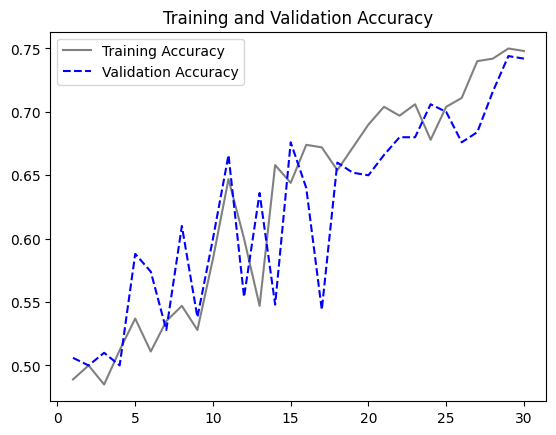

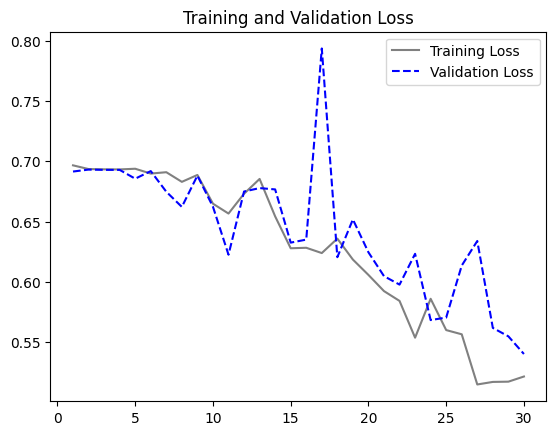

In [ ]:
accuracy = Model_3.history["accuracy"]
val_accuracy = Model_3.history["val_accuracy"]

loss = Model_3.history["loss"]
val_loss = Model_3.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.tf")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'Loss: {test_loss:.3f}')
print(f"Test accuracy: {test_acc:.3f}")

16/16 [==============================] - 0s 10ms/step - loss: 0.6341 - accuracy: 0.7080
Loss: 0.634
Test accuracy: 0.708


**Model - 4 MaxPooling Operation with Increase in filters from 64 to 1024 in 5 Input Layers with the use of Augmented Images and Dropout rate of 0.6**

In [ ]:
inputs = keras.Input(shape=(180,180,3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=1024, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.6)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 sequential_3 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_9 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_47 (Conv2D)          (None, 178, 178, 64)      1792      
                                                                 
 max_pooling2d_38 (MaxPooli  (None, 89, 89, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_48 (Conv2D)          (None, 87, 87, 128)       73856     
                                                           

In [ ]:
# Compiling the Model
model.compile(loss= "binary_crossentropy",
              optimizer= "adam",
              metrics= ['accuracy'])


# Saving the results of the model
callbacks = [
keras.callbacks.ModelCheckpoint(
    filepath="convnet_from_scratch.tf",
    save_best_only=True,
    monitor="val_loss",
    save_format="tf")
]

# Model Fit
Model_4 = model.fit(
          train_dataset,
          epochs= 30,
          validation_data= validation_dataset,
          callbacks= callbacks
          )

Epoch 1/30
32/32 [==============================] - 6s 125ms/step - loss: 0.7144 - accuracy: 0.4910 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/30
32/32 [==============================] - 3s 100ms/step - loss: 0.6943 - accuracy: 0.4890 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/30
32/32 [==============================] - 1s 39ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/30
32/32 [==============================] - 1s 39ms/step - loss: 0.6934 - accuracy: 0.4700 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/30
32/32 [==============================] - 3s 98ms/step - loss: 0.6933 - accuracy: 0.5030 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/30
32/32 [==============================] - 1s 38ms/step - loss: 0.6933 - accuracy: 0.4880 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/30
32/32 [==============================] - 3s 98ms/step - loss: 0.6933 - accuracy: 0.4760 - val_loss: 0.6929 - val_accuracy: 0.5400
Epoch 8/30


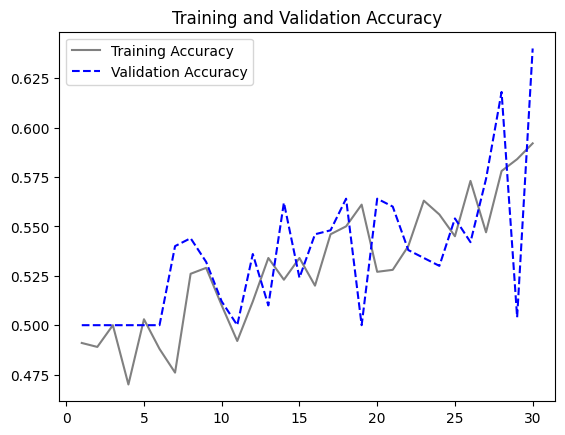

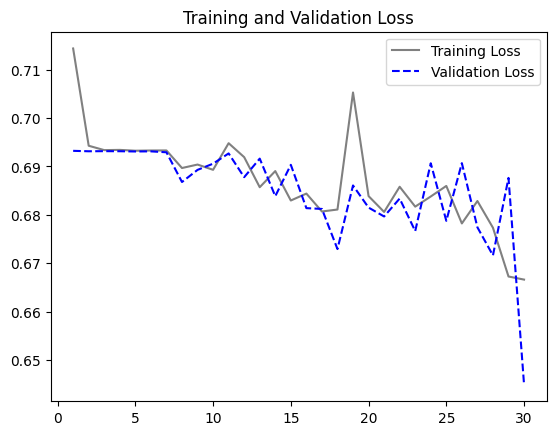

In [ ]:
accuracy = Model_4.history["accuracy"]
val_accuracy = Model_4.history["val_accuracy"]

loss = Model_4.history["loss"]
val_loss = Model_4.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.tf")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'Loss: {test_loss:.3f}')
print(f"Test accuracy: {test_acc:.3f}")

16/16 [==============================] - 0s 13ms/step - loss: 0.6696 - accuracy: 0.6260
Loss: 0.670
Test accuracy: 0.626


**Consider the Cats & Dogs example. Start initially with a training sample of 1000, a
validation sample of 500, and a test sample of 500 (like in the text). Use any technique
to reduce overfitting and improve performance in developing a network that you train
from scratch. What performance did you achieve?**

Upon condiering the 4 models with the training sample of 1000, we could see the loss and accuracy as below

Model 1
Loss: 0.626
Test accuracy: 0.644
Model 2
Loss: 0.552
Test accuracy: 0.748
Model 3
Loss: 0.634
Test accuracy: 0.708
Model 4
Loss: 0.670
Test accuracy: 0.626
**Model 2 has highest accuracy about 74.8% and loss of 55.2%**

In [ ]:
Model_1 = (0.626, 0.644)
Model_2 = (0.552, 0.748)
Model_3 = (0.634,0.708)
Model_4 = (0.670, 0.626)

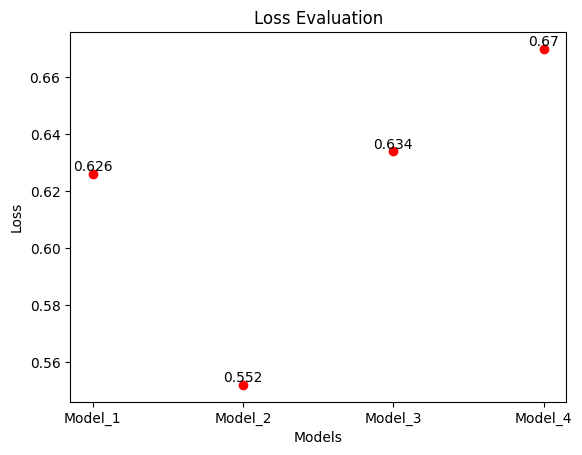

In [ ]:
Models = ("Model_1","Model_2","Model_3","Model_4")
Loss = (Model_1[0],Model_2[0],Model_3[0],Model_4[0])
Accuracy = (Model_1[1],Model_2[1],Model_3[1],Model_4[1])

plt.scatter(Models,Loss,color="red")
plt.title("Loss Evaluation")
plt.ylabel("Loss")
plt.xlabel("Models")

for (xi, yi) in zip(Models,Loss):
    plt.text(xi, yi, yi, va='bottom', ha='center')

plt.show()

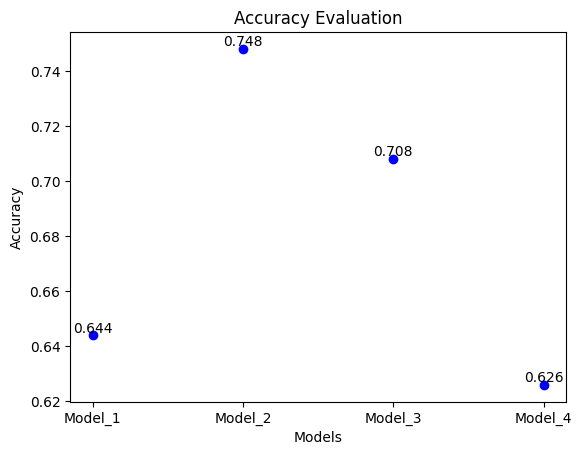

In [ ]:
plt.scatter(Models,Accuracy,color="blue")
plt.title("Accuracy Evaluation")
plt.ylabel("Accuracy")
plt.xlabel("Models")

for (xi, yi) in zip(Models,Accuracy):
    plt.text(xi, yi, yi, va='bottom', ha='center')

plt.show()


Increase your training sample size. You may pick any amount. Keep the validation and
test samples the same as above. Optimize your network (again training from scratch).
What performance did you achieve?

Model - 5 MaxPooling Operation with Increase in filters from 32 to 256 in 5 Input Layers with the data being used from the Augmented Images and a droput rate of 0.5

In [ ]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1250)
make_subset("test", start_index=1500, end_index=1750)

In [ ]:
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [ ]:
data_augmentation_1 = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.15),
        layers.RandomZoom(0.25)
    ]
)



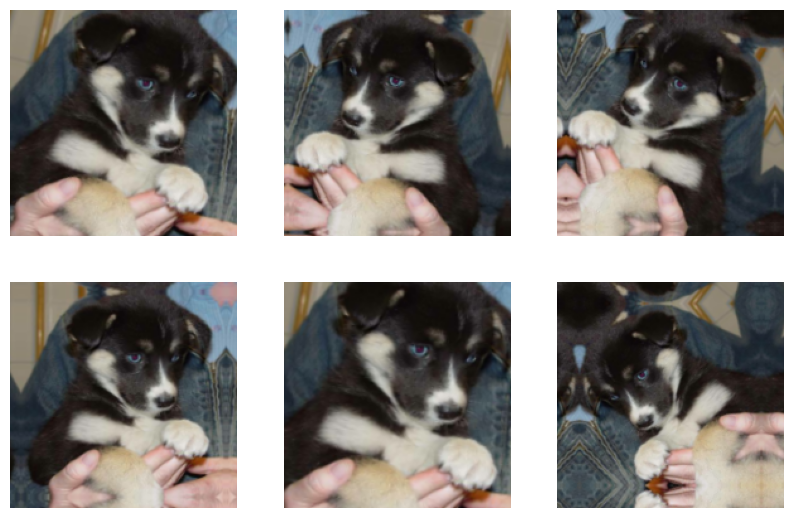

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
   for i in range(6):
      augmented_images = data_augmentation_1(images)
      ax = plt.subplot(3, 3, i + 1)
      plt.imshow(augmented_images[0].numpy().astype("uint8"))
      plt.axis("off")

Increasing the Training sample from 1000 to 2000 and filters from 32 to 256 in 5 Input layers


In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation_1(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()


Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 sequential_4 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_10 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_52 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_42 (MaxPooli  (None, 89, 89, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_53 (Conv2D)          (None, 87, 87, 64)        18496     
                                                          

In [ ]:
# Compiling the Model
model.compile(loss= "binary_crossentropy",
              optimizer= "adam",
              metrics= ['accuracy'])

# Saving the results of the model
callbacks = [
keras.callbacks.ModelCheckpoint(
    filepath="convnet_from_scratch1.tf",
    save_best_only=True,
    monitor="val_loss",
    save_format="tf")
]

# Model Fit
Model_5 = model.fit(
          train_dataset,
          epochs= 50,
          validation_data= validation_dataset,
          callbacks= callbacks
          )

Epoch 1/50
63/63 [==============================] - 6s 54ms/step - loss: 0.6240 - accuracy: 0.6480 - val_loss: 0.6146 - val_accuracy: 0.6620
Epoch 2/50
63/63 [==============================] - 4s 60ms/step - loss: 0.6042 - accuracy: 0.6660 - val_loss: 0.5810 - val_accuracy: 0.6920
Epoch 3/50
63/63 [==============================] - 3s 50ms/step - loss: 0.6015 - accuracy: 0.6875 - val_loss: 0.5699 - val_accuracy: 0.7000
Epoch 4/50
63/63 [==============================] - 3s 52ms/step - loss: 0.5959 - accuracy: 0.6775 - val_loss: 0.5610 - val_accuracy: 0.7240
Epoch 5/50
63/63 [==============================] - 1s 22ms/step - loss: 0.5874 - accuracy: 0.7090 - val_loss: 0.5643 - val_accuracy: 0.7020
Epoch 6/50
63/63 [==============================] - 1s 22ms/step - loss: 0.5792 - accuracy: 0.7005 - val_loss: 0.5937 - val_accuracy: 0.6660
Epoch 7/50
63/63 [==============================] - 3s 50ms/step - loss: 0.5788 - accuracy: 0.6975 - val_loss: 0.5456 - val_accuracy: 0.7220
Epoch 8/50
63

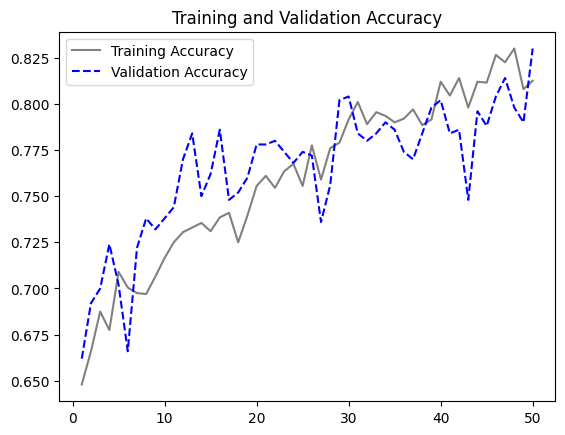

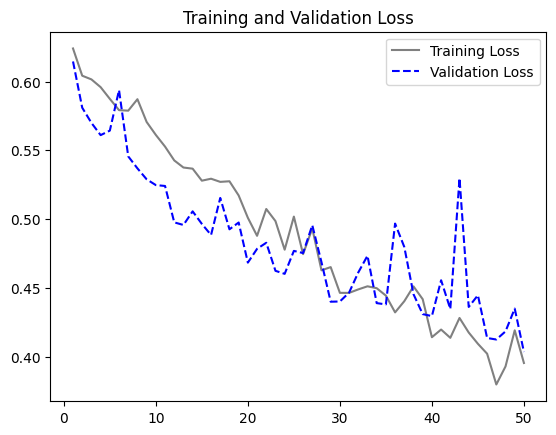

In [ ]:
accuracy = Model_5.history["accuracy"]
val_accuracy = Model_5.history["val_accuracy"]

loss = Model_5.history["loss"]
val_loss = Model_5.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch1.tf")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'Loss: {test_loss:.3f}')
print(f"Test accuracy: {test_acc:.3f}")

16/16 [==============================] - 0s 9ms/step - loss: 0.4473 - accuracy: 0.8120
Loss: 0.447
Test accuracy: 0.812


Model 2 is built with 1000 samples and it resulted in 74% accuracy and further increasing in the training samples to 2000 increased the accuracy to almost 81.2 % thats an increase in 7%

RMSProp is an adaptive learning rate optimizer that improves on AdaGrad by normalizing the gradient updates. This makes it less sensitive to the scale of the gradients and can help to prevent oscillations. Adam is another adaptive learning rate optimizer that combines the best of RMSProp and momentum. It is generally considered to be the most robust and effective optimizer for deep learning.

Model - 6 Strides Operation with Padding being "Same" with Increase in filters from 32 to 256 in 5 Input Layers with the data being used from the Augmented Images and a droput rate of 0.5

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation_1(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(filters=64, kernel_size=3, strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(filters=128, kernel_size=3, strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(filters=256, kernel_size=3, strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(filters=256, kernel_size=3, strides=2, activation="relu", padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)


In [ ]:
model.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 sequential_5 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_12 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_62 (Conv2D)          (None, 90, 90, 32)        896       
                                                                 
 conv2d_63 (Conv2D)          (None, 45, 45, 64)        18496     
                                                                 
 conv2d_64 (Conv2D)          (None, 23, 23, 128)       73856     
                                                                 
 conv2d_65 (Conv2D)          (None, 12, 12, 256)       295

In [ ]:
# Compiling the Model
model.compile(loss= "binary_crossentropy",
              optimizer= "adam",
              metrics= ['accuracy'])


# Saving the results of the model
callbacks = [
keras.callbacks.ModelCheckpoint(
    filepath="convnet_from_scratch1.tf",
    save_best_only=True,
    monitor="val_loss",
    save_format="tf")
]

# Model Fit
Model_6 = model.fit(
          train_dataset,
          epochs= 50,
          validation_data= validation_dataset,
          callbacks= callbacks
          )

Epoch 1/50
63/63 [==============================] - 6s 49ms/step - loss: 0.6950 - accuracy: 0.5140 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/50
63/63 [==============================] - 3s 43ms/step - loss: 0.6939 - accuracy: 0.4865 - val_loss: 0.6931 - val_accuracy: 0.5120
Epoch 3/50
63/63 [==============================] - 3s 42ms/step - loss: 0.6934 - accuracy: 0.4950 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 4/50
63/63 [==============================] - 3s 47ms/step - loss: 0.6938 - accuracy: 0.4950 - val_loss: 0.6884 - val_accuracy: 0.5580
Epoch 5/50
63/63 [==============================] - 3s 42ms/step - loss: 0.6870 - accuracy: 0.5170 - val_loss: 0.6832 - val_accuracy: 0.5420
Epoch 6/50
63/63 [==============================] - 1s 18ms/step - loss: 0.6965 - accuracy: 0.5010 - val_loss: 0.6936 - val_accuracy: 0.4820
Epoch 7/50
63/63 [==============================] - 1s 18ms/step - loss: 0.6921 - accuracy: 0.5005 - val_loss: 0.6987 - val_accuracy: 0.5180
Epoch 8/50
63

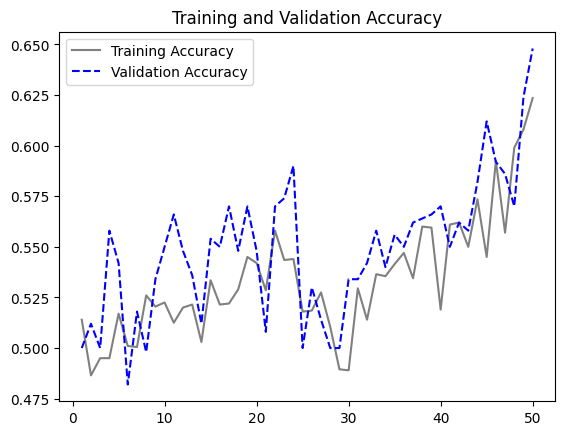

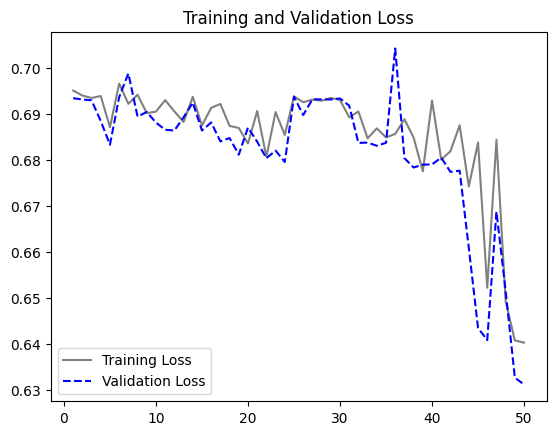

In [ ]:
accuracy = Model_6.history["accuracy"]
val_accuracy = Model_6.history["val_accuracy"]

loss = Model_6.history["loss"]
val_loss = Model_6.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch1.tf")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'Loss: {test_loss:.3f}')
print(f"Test accuracy: {test_acc:.3f}")

16/16 [==============================] - 0s 8ms/step - loss: 0.6914 - accuracy: 0.5820
Loss: 0.691
Test accuracy: 0.582


Using Strides = 2 does afftect the performance if the model and the accuracy has dropped from 81% to 58%

The loss of 0.691 and test accuracy of 0.582 are relatively high, suggesting that the model is not performing well. Turning on strides with padding may help to improve the performance of the model, as it can help to reduce overfitting and improve the generalization ability of the model.

Strides are used to downsample the feature maps during convolution operations. When strides are used, the output feature map is smaller than the input feature map. This can help to reduce the number of parameters in the model and improve the computational efficiency. However, using strides can also lead to overfitting, as the model may learn to focus on specific features in the training data that are not present in the test data.

In [ ]:
Model_5 = (0.447,0.812)
Model_6 = (0.691,0.582)

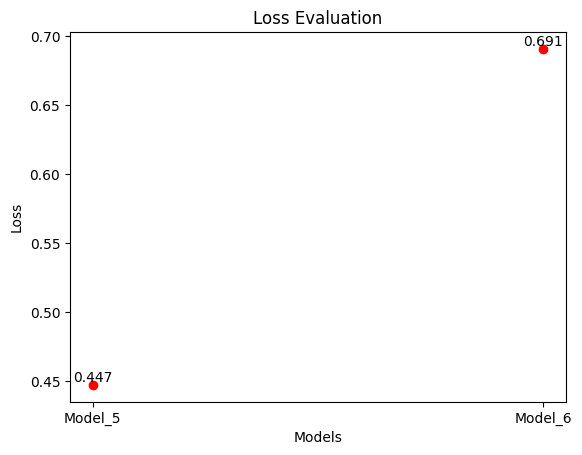

In [ ]:
Models = ("Model_5","Model_6")
Loss = (Model_5[0], Model_6[0])
Accuracy = (Model_5[1], Model_6[1])

plt.scatter(Models, Loss, color="red")
plt.title("Loss Evaluation")
plt.xlabel("Models")
plt.ylabel("Loss")

for (xi, yi) in zip(Models,Loss):
    plt.text(xi, yi, yi, va='bottom', ha='center')

plt.show()

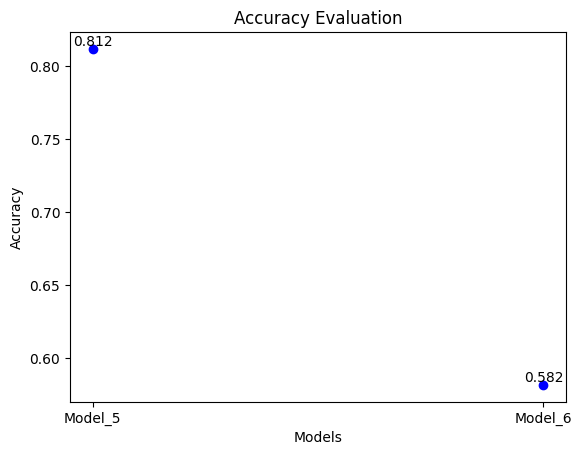

In [ ]:
plt.scatter(Models, Accuracy, color="blue")
plt.title("Accuracy Evaluation")
plt.xlabel("Models")
plt.ylabel("Accuracy")

for (xi, yi) in zip(Models,Accuracy):
    plt.text(xi, yi, yi, va='bottom', ha='center')

plt.show()

Model_5 has a lower loss (0.447) and higher accuracy (0.812) than Model_6 (loss: 0.691, accuracy: 0.582). This means that Model_5 is better at making accurate predictions than Model_6. Upon increasing the input sample compared to the 1000 in Model 1 - 4 has increased the accrucay from 74 % to 81 %

**Increasing the Sample to 3000**

In [ ]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_1")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1500)
make_subset("validation", start_index=1000, end_index=1250)
make_subset("test", start_index=1500, end_index=1750)

In [ ]:
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 3000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break


data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [ ]:
data_augmentation_2 = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.15),
        layers.RandomZoom(0.25)
    ]
)

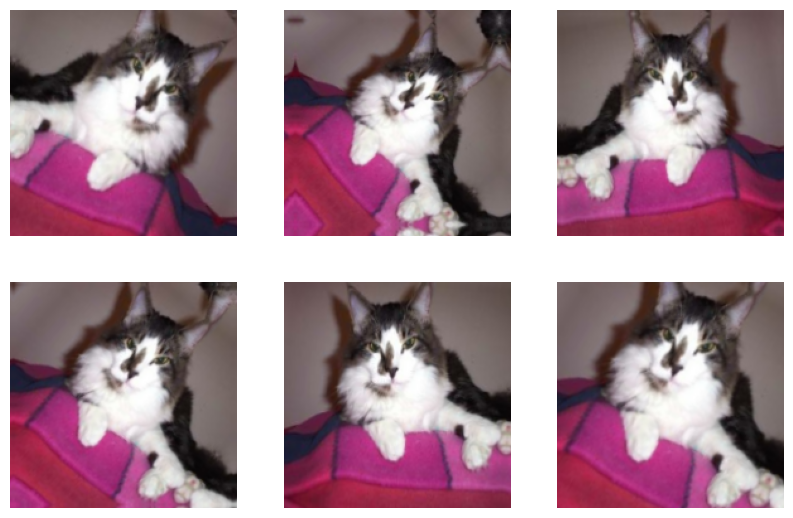

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
   for i in range(6):
      augmented_images = data_augmentation_2(images)
      ax = plt.subplot(3, 3, i + 1)
      plt.imshow(augmented_images[0].numpy().astype("uint8"))
      plt.axis("off")

**Training Sample - 3000 Model 7 Max Operation with Increase in filters from 32 to 256 in 5 Input Layers with the data being used from the Augmented Images and a droput rate of 0.5**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation_2(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 sequential_6 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_13 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_67 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_50 (MaxPooli  (None, 89, 89, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_68 (Conv2D)          (None, 87, 87, 64)        18496     
                                                          

In [ ]:
# Compiling the Model
model.compile(loss= "binary_crossentropy",
              optimizer= "adam",
              metrics= ['accuracy'])



# Saving the results of the model
callbacks = [
keras.callbacks.ModelCheckpoint(
    filepath="convnet_from_scratch2.tf",
    save_best_only=True,
    monitor="val_loss",
    save_format="tf")
]

# Model Fit
Model_7 = model.fit(
          train_dataset,
          epochs= 50,
          validation_data= validation_dataset,
          callbacks= callbacks
          )

Epoch 1/50
94/94 [==============================] - 7s 51ms/step - loss: 0.6956 - accuracy: 0.5007 - val_loss: 0.6921 - val_accuracy: 0.5000
Epoch 2/50
94/94 [==============================] - 4s 39ms/step - loss: 0.6898 - accuracy: 0.5353 - val_loss: 0.6861 - val_accuracy: 0.5000
Epoch 3/50
94/94 [==============================] - 4s 39ms/step - loss: 0.6651 - accuracy: 0.5920 - val_loss: 0.6250 - val_accuracy: 0.6380
Epoch 4/50
94/94 [==============================] - 2s 20ms/step - loss: 0.6650 - accuracy: 0.6013 - val_loss: 0.6360 - val_accuracy: 0.6480
Epoch 5/50
94/94 [==============================] - 2s 20ms/step - loss: 0.6480 - accuracy: 0.6303 - val_loss: 0.6288 - val_accuracy: 0.6440
Epoch 6/50
94/94 [==============================] - 4s 38ms/step - loss: 0.6383 - accuracy: 0.6393 - val_loss: 0.6177 - val_accuracy: 0.6720
Epoch 7/50
94/94 [==============================] - 2s 20ms/step - loss: 0.6305 - accuracy: 0.6510 - val_loss: 0.6597 - val_accuracy: 0.6240
Epoch 8/50
94

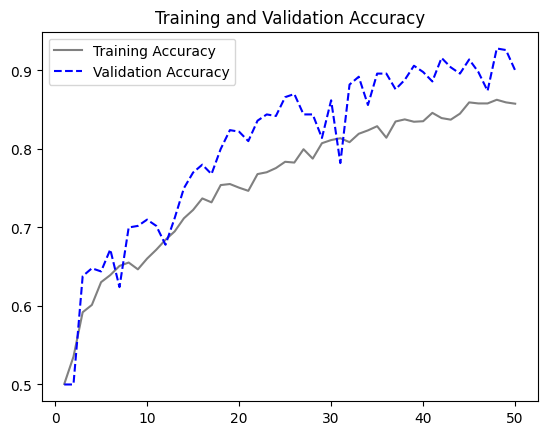

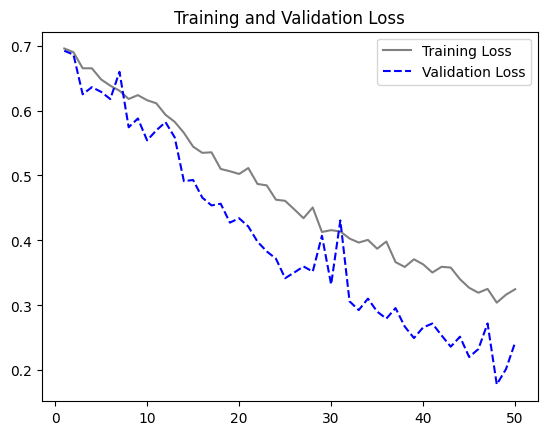

In [ ]:
accuracy = Model_7.history["accuracy"]
val_accuracy = Model_7.history["val_accuracy"]

loss = Model_7.history["loss"]
val_loss = Model_7.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch2.tf")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'Loss: {test_loss:.3f}')
print(f"Test accuracy: {test_acc:.3f}")

16/16 [==============================] - 0s 10ms/step - loss: 0.4099 - accuracy: 0.8500
Loss: 0.410
Test accuracy: 0.850


**The loss of 0.410 and test accuracy of 0.850 are very good results, suggesting that the model is performing well.**

**Using 7 MaxPooling operations with an increase in filters from 32 to 256 in 5 input layers is a common architecture for convolutional neural networks (CNNs). This architecture is designed to extract high-level features from images, which can then be used to classify the images or perform other tasks.**



**Model 8 MaxPooling + Strides of Step-Size 2 Operation with Increase in filters from 32 to 256 in 5 Input Layers with the data being used from the Augmented Images and a droput rate of 0.5**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation_2(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, strides=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, strides=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, strides=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2,strides=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()


Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 sequential_6 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_14 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_72 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_54 (MaxPooli  (None, 89, 89, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_73 (Conv2D)          (None, 87, 87, 64)        18496     
                                                          

In [ ]:
# Compiling the Model
model.compile(loss= "binary_crossentropy",
              optimizer= "adam",
              metrics= ['accuracy'])


# Saving the results of the model
callbacks = [
keras.callbacks.ModelCheckpoint(
    filepath="convnet_from_scratch2.tf",
    save_best_only=True,
    monitor="val_loss",
    save_format="tf")
]


# Model Fit
Model_8 = model.fit(
          train_dataset,
          epochs= 50,
          validation_data= validation_dataset,
          callbacks= callbacks
          )

Epoch 1/50
94/94 [==============================] - 7s 40ms/step - loss: 0.6932 - accuracy: 0.5193 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 2/50
94/94 [==============================] - 4s 39ms/step - loss: 0.6895 - accuracy: 0.5337 - val_loss: 0.6830 - val_accuracy: 0.5040
Epoch 3/50
94/94 [==============================] - 4s 40ms/step - loss: 0.6869 - accuracy: 0.5477 - val_loss: 0.6558 - val_accuracy: 0.5600
Epoch 4/50
94/94 [==============================] - 4s 44ms/step - loss: 0.6592 - accuracy: 0.5993 - val_loss: 0.6130 - val_accuracy: 0.6480
Epoch 5/50
94/94 [==============================] - 4s 39ms/step - loss: 0.6462 - accuracy: 0.6200 - val_loss: 0.5957 - val_accuracy: 0.6840
Epoch 6/50
94/94 [==============================] - 2s 21ms/step - loss: 0.6476 - accuracy: 0.6317 - val_loss: 0.6083 - val_accuracy: 0.6660
Epoch 7/50
94/94 [==============================] - 2s 21ms/step - loss: 0.6355 - accuracy: 0.6403 - val_loss: 0.6632 - val_accuracy: 0.5940
Epoch 8/50
94

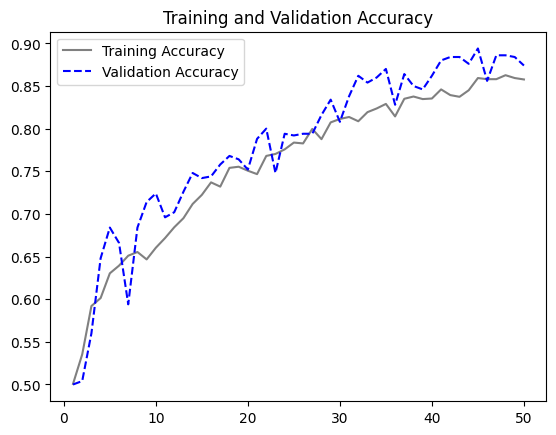

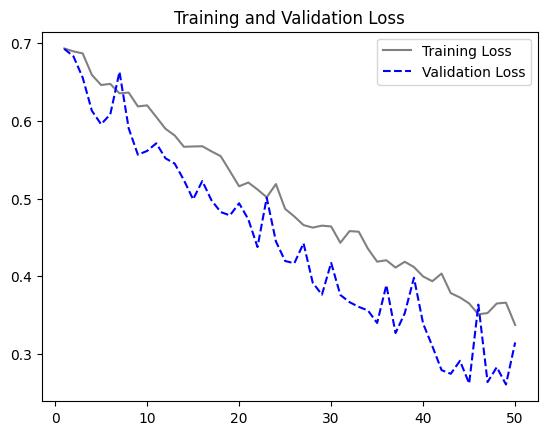

In [ ]:
ccuracy = Model_8.history["accuracy"]
val_accuracy = Model_8.history["val_accuracy"]

loss = Model_8.history["loss"]
val_loss = Model_8.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch2.tf")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'Loss: {test_loss:.3f}')
print(f"Test accuracy: {test_acc:.3f}")


16/16 [==============================] - 0s 9ms/step - loss: 0.4883 - accuracy: 0.8140
Loss: 0.488
Test accuracy: 0.814



**The loss of 0.488 and test accuracy of 0.814 are also good results, suggesting that the model is performing well. Using MaxPooling with strides of step size 2 is a common technique for reducing the spatial dimensions of feature maps. This can help to improve the computational efficiency of the model and prevent overfitting.**

**Model - 9 MaxPooling + Strides of Step-Size 2 with Padding turned on Operation with Increase in filters from 32 to 512 in 5 Input Layers with the data being used from the Augmented Images and a droput rate of 0.5**


In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation_2(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, strides=2, padding="same")(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, strides=2, padding="same")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, strides=2, padding="same")(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2,strides=2, padding="same")(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 sequential_6 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_15 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_77 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_58 (MaxPooli  (None, 89, 89, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_78 (Conv2D)          (None, 87, 87, 64)        18496     
                                                          

In [ ]:
# Compiling the Model
model.compile(loss= "binary_crossentropy",
              optimizer= "adam",
              metrics= ['accuracy'])


# Saving the results of the model
callbacks = [
keras.callbacks.ModelCheckpoint(
    filepath="convnet_from_scratch2.tf",
    save_best_only=True,
    monitor="val_loss",
    save_format="tf")
]


# Model Fit
Model_9 = model.fit(
          train_dataset,
          epochs= 50,
          validation_data= validation_dataset,
          callbacks= callbacks
          )

Epoch 1/50
94/94 [==============================] - 8s 50ms/step - loss: 0.6951 - accuracy: 0.5050 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 2/50
94/94 [==============================] - 4s 39ms/step - loss: 0.6941 - accuracy: 0.5020 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 3/50
94/94 [==============================] - 4s 39ms/step - loss: 0.6936 - accuracy: 0.5030 - val_loss: 0.6916 - val_accuracy: 0.5000
Epoch 4/50
94/94 [==============================] - 2s 21ms/step - loss: 0.6938 - accuracy: 0.5100 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/50
94/94 [==============================] - 2s 21ms/step - loss: 0.6939 - accuracy: 0.5130 - val_loss: 0.6942 - val_accuracy: 0.5000
Epoch 6/50
94/94 [==============================] - 2s 20ms/step - loss: 0.6933 - accuracy: 0.4990 - val_loss: 0.6995 - val_accuracy: 0.5000
Epoch 7/50
94/94 [==============================] - 4s 39ms/step - loss: 0.6912 - accuracy: 0.5190 - val_loss: 0.6848 - val_accuracy: 0.5340
Epoch 8/50
94

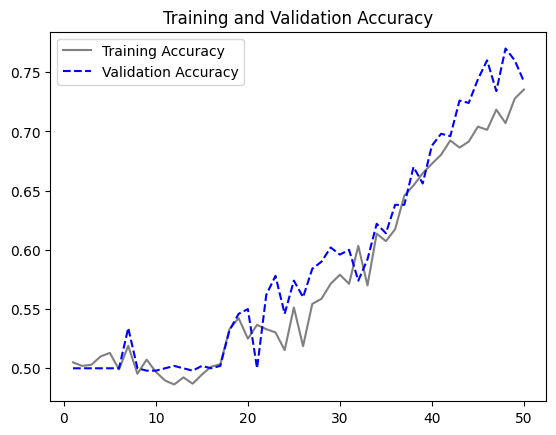

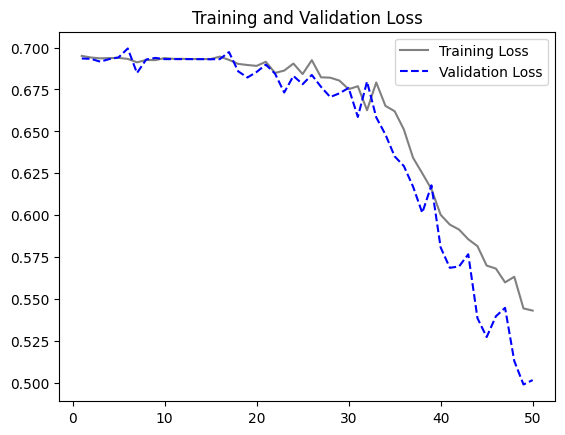

In [ ]:
accuracy = Model_9.history["accuracy"]
val_accuracy = Model_9.history["val_accuracy"]

loss = Model_9.history["loss"]
val_loss = Model_9.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch2.tf")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'Loss: {test_loss:.3f}')
print(f"Test accuracy: {test_acc:.3f}")

16/16 [==============================] - 0s 9ms/step - loss: 0.5551 - accuracy: 0.7360
Loss: 0.555
Test accuracy: 0.736


In [ ]:
Model_7 = (0.410,0.850)
Model_8 = (0.488,0.814)
Model_9 = (0.555,0.736)

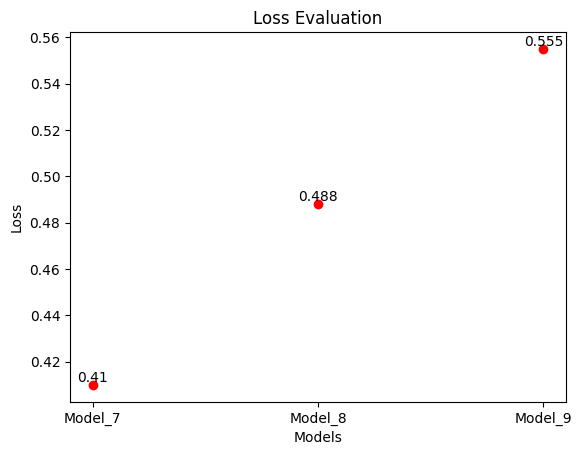

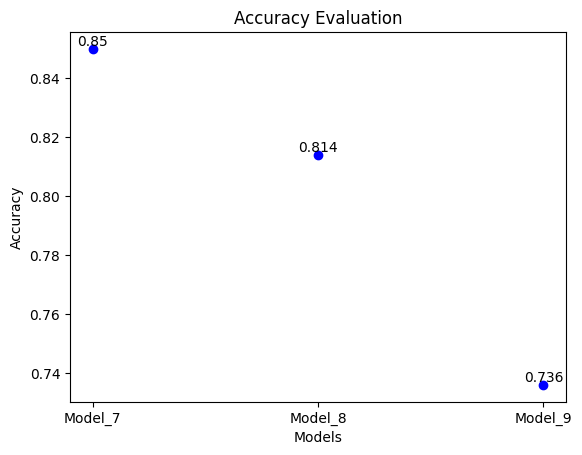

In [ ]:
Models = ("Model_7","Model_8","Model_9")
Loss = (Model_7[0], Model_8[0],Model_9[0])
Accuracy = (Model_7[1], Model_8[1],Model_9[1])

# Loss Evaluation
plt.scatter(Models, Loss, color="red")
plt.title("Loss Evaluation")
plt.xlabel("Models")
plt.ylabel("Loss")

for (xi, yi) in zip(Models,Loss):
    plt.text(xi, yi, yi, va='bottom', ha='center')

plt.show()

# Accuracy Evaluation
plt.scatter(Models, Accuracy, color="blue")
plt.title("Accuracy Evaluation")
plt.xlabel("Models")
plt.ylabel("Accuracy")

for (xi, yi) in zip(Models,Accuracy):
    plt.text(xi, yi, yi, va='bottom', ha='center')

plt.show()

model 10

In [ ]:
#Looking at all the models performances

Model_1 = (0.626,0.644)
Model_2 = (0.552,0.748)
Model_3 = (0.634,0.708)
Model_4 = (0.670,0.626)
Model_5 = (0.447,0.812)
Model_6 = (0.691,0.582)
Model_7 = (0.410,0.850)
Model_8 = (0.488,0.814)
Model_9 = (0.555,0.736)

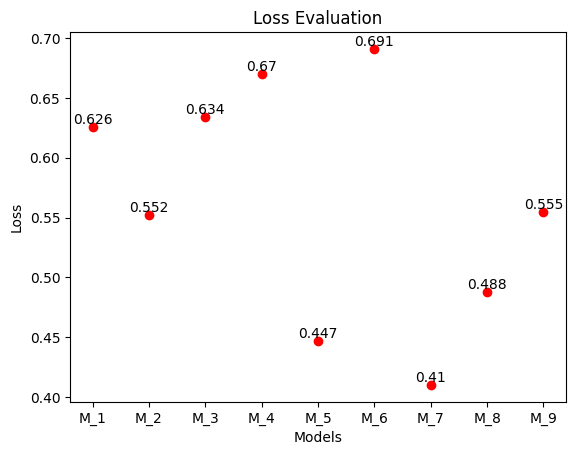

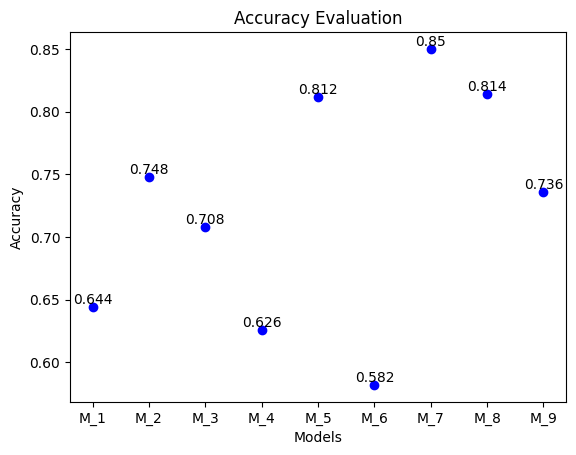

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Models = ("M_1","M_2","M_3","M_4","M_5","M_6","M_7","M_8","M_9")
Loss = (Model_1[0], Model_2[0],Model_3[0],Model_4[0],Model_5[0],Model_6[0],Model_7[0],Model_8[0],Model_9[0])
Accuracy = (Model_1[1], Model_2[1],Model_3[1],Model_4[1],Model_5[1],Model_6[1],Model_7[1],Model_8[1],Model_9[1])

# Loss Evaluation
plt.scatter(Models, Loss, color="red")
plt.title("Loss Evaluation")
plt.xlabel("Models")
plt.ylabel("Loss")

for (xi, yi) in zip(Models,Loss):
    plt.text(xi, yi, yi, va='bottom', ha='center')

plt.show()

# Accuracy Evaluation
plt.scatter(Models, Accuracy, color="blue")
plt.title("Accuracy Evaluation")
plt.xlabel("Models")
plt.ylabel("Accuracy")

for (xi, yi) in zip(Models,Accuracy):
    plt.text(xi, yi, yi, va='bottom', ha='center')

plt.show()


**Model 7 (MaxPooling Operation with Increase in filters from 32 to 256 in 5 Input Layers with the data being used from the Augmented Images and a droput rate of 0.5) has the lowest loss (0.410) and the highest accuracy (0.850) out of all the models**